In [75]:
import PIL
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from numpy.typing import NDArray
from scipy import fftpack
from matplotlib.colors import LogNorm

In [76]:
def plot_spectrum(spectrum: NDArray):
    # use logarithmic coloring
    plt.imshow(np.abs(spectrum), norm=LogNorm(vmin=5))
    plt.colorbar()


def fourier_transform(input_image: NDArray) -> NDArray:
    return fftpack.fft2(input_image)


def inverse_fourier_transform(transformed: NDArray) -> NDArray:
    return fftpack.ifft2(transformed).real




In [97]:
def denoise(transformed: NDArray, keep_fraction: float) -> NDArray:
    shifted = fftpack.fftshift(transformed)

    rows, cols = shifted.shape
    crow, ccol = rows // 2, cols // 2

    r_keep = int(rows * keep_fraction)
    c_keep = int(cols * keep_fraction)

    mask = np.zeros_like(shifted, dtype=bool)
    mask[
        crow - r_keep : crow + r_keep,
        ccol - c_keep : ccol + c_keep
    ] = True

    shifted_filtered = shifted * mask

    return fftpack.ifftshift(shifted_filtered)

In [98]:
image_url = "https://scipy-lectures.org/_downloads/moonlanding.png"
image = np.array(PIL.Image.open(urllib.request.urlopen(image_url)))  # noqa

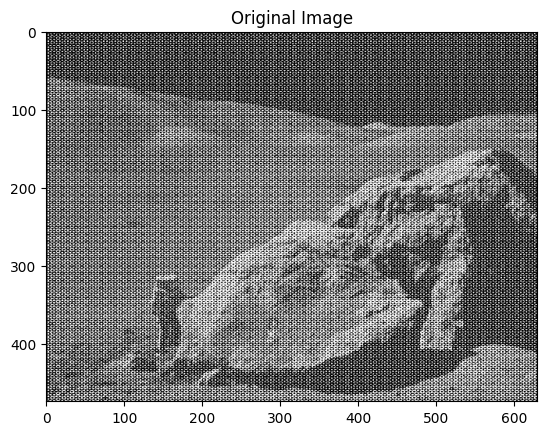

In [99]:
plt.figure()
_ = plt.imshow(image, plt.cm.gray)
_ = plt.title("Original Image")

In [95]:
transformed_image = fourier_transform(image)
transformed_denoised_image = denoise(transformed_image, keep_fraction=0.1)
denoised_image = inverse_fourier_transform(transformed_denoised_image)

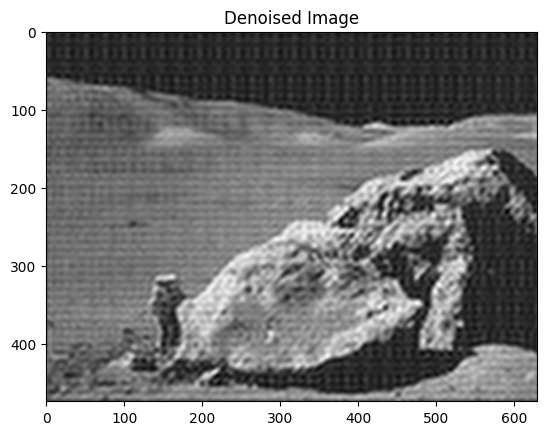

In [96]:
plt.figure()
_ = plt.imshow(denoised_image, plt.cm.gray)
_ = plt.title("Denoised Image")